<a href="https://colab.research.google.com/github/vivekp12/dst-group-project-2/blob/main/VivekP/04-ReLUInvestigation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Investigation of Rectified Linear Unit (ReLU) Activation Function

In this document, we investigate the rectified linear unit (ReLU) activation function in using neural networks to classify brain tumours.

**Table of Contents**
1. Requirements
2. Mathematical Background on Neural Networks
3. Mathematical Background on ReLU Activation
4. Investigation of ReLU Activation
5. Conclusion

# 1. Requirements

We load the required packages below.

# 2. Neural Network

A neural network (NN) is a machine learning model inspired by how the *human brain* works (see [16, 20] for a detailed history, including the work of McCullogh and Pitts, the development of the perceptron, and more). In this document, we come full circle, as we use it to classify brain tumours!

## 2.1. Basics

We explain the basics of neural networks, using information from [17, 18]. A neural network (NN) is composed of layers of interconnected nodes called **neurons**. These neurons are organized in three main layers:

- **Input layer**: This is where data enters the network. Each input feature (e.g., pixels of an image or values in a dataset) corresponds to one neuron in this layer.
- **Hidden layers**: These intermediate layers perform the actual processing. Each neuron in a hidden layer receives inputs from the previous layer, applies a mathematical operation (known as an **activation function**), and passes the result to the next layer.
- **Output layer**: This layer produces the network's final output or prediction, such as a classification label.

Collectively, this is called the **architecture** of the NN. This is shown in the Figure below.

<figure>
    <img src="https://miro.medium.com/v2/resize:fit:1400/1*L1bH8PUeLf67Aat-h5phpw.png" alt="Figure taken from Medium Article - accessed 10/11/2024." title="Beautiful Sunset">
    <figcaption>Figure showing the architecture of a neural network. Figure taken from <a href="https://miro.medium.com/v2/resize:fit:1400/1*L1bH8PUeLf67Aat-h5phpw.png">Medium Article</a> - accessed 10/11/2024 08:37.</figcaption>
</figure>

# 2.2. Mathematical formulation

To understand how this works mathematically, we give an example and provide an analogy to the human nervous system. Consider a neuron $i$ in a hidden or output layer. It receives inputs from previous-layer neurons $a_j$, with respective outputs $x_{a_j}$. Each input is **weighted** before passing through an activation function $f$. Mathematically, we write the output of neuron $i$ as:

$$
f(W_{0,i} + \sum_{j} W_{j,i} x_{a_j}).
$$

Here, $W_{0,i}$ is a bias term, and the $W_{j,i}$ values are weights. The bias term can be thought of as a neuron $a_0$ that always provides a signal $x_{a_0} = 1$, helping to adjust the activation function's behavior by situating the output signal in the appropriate range [18].

This mimics the biological neuron, which takes *signals* (the $x_{a_j}$ here) from other neurons (say we take in signals relating to taste, sight, touch, hearing and emotions) and based on the phenomenon (e.g. if you are eating, taste and touch are most important) there is a certain **importance** of each signal (the **weights**, which we will call $W_{i,j}$). The signal will be processed into some other signal (this is the part where we pass to the activation function) and then transmitted (this is where we output to the next layer).

For our tumour classification task, we are going to make use of a special kind of neural network: the convolutional neural network.

# 2.3. Convolutional Neural Network

A convolutional neural network (CNN) is a specialized type of neural network. CNNs are especially good at image-related tasks (like recognizing objects in pictures) because they can detect patterns and spatial hierarchies in data, such as edges, textures, and shapes [24]. They are even compared to the way the brain achieves vision processing in living organisms like cats [23]. They are the "de-facto standard" [19] in image processing, though in some cases newer architectures like transformers are being favoured. The picture below summarises how they work.

<figure>
    <img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2024/08/183560-qcmbdpukpdviccdd-66c7065d8f850.webp" alt="Figure from Analytics Vidhya - accessed 10/11/2024.">
    <figcaption>Figure from <a href="https://cdn.analyticsvidhya.com/wp-content/uploads/2024/08/183560-qcmbdpukpdviccdd-66c7065d8f850.webp">Analytics Vidhya</a> - accessed 10/11/2024.</figcaption>
</figure>

We explain this in words, focussing on the concepts rather than techincal details. We present how CNNs work, synthesising information from [25, 26, 27]. The way they work are:

1. Input: Instead of connecting every input to every neuron, CNNs use small filters, or kernels, that slide over the image to detect features. Each filter is essentially a small matrix (e.g. 3x3), which multiplies and sums pixel values (mathematically, this is a dot product) in small regions of the input image. This process mimics the way our vision works. Work by Hubel and Wiesel in the 1950s and 1960s showed that neurons related to vision individually respond to small regions of the visual field for cats [19] and therefore the kernel scans small regions of the image. The output of the convolutional neuron is sometimes called a feature map [19] or activation map [25].

    Linking back to the previous section, we can see an example of a tensor: the image input is a tensor with shape (number of inputs) × (input height) × (input width) × (input channels (3 if RGB)) [19]. In the image below, we show the action of a convolutional kernel on parts of a 64 x 64 image.

<figure>
  <img src="https://poloclub.github.io/cnn-explainer/assets/figures/convlayer_detailedview_demo.gif" alt="Convolutional Layer Demo">
  <figcaption>Figure showing a detailed view of a convolutional layer in action. GIF taken from [25]. </figcaption>
</figure>

The kernels have some hyper-parameters, called padding, kernel size and stride. We explain this below, synthesising information from [25].
- Padding: When a filter extends beyond the edge of the activation map, padding is used to preserve data at the borders. Techniques to do this vary. A simple padding method is zero-padding, which involves adding zeroes around the edges of the input. This technique is frequently employed in high-performing CNNs, such as AlexNet (60 million parameters, 650,000 neurons [27]). This helps in maintaining spatial dimensions and improves performance [26]. In essence, it is like augmenting the image so that we can extract information from the corners and edges better. Other padding techniques can be found in an accessible tutorial in [28].

- Kernel Size: Also known as the filter size, kernel size defines the dimensions of the sliding window used to scan over the input. This hyperparameter greatly impacts feature extraction:

    - Smaller kernels (e.g., 3x3) capture finer, highly localized features, allowing for deeper architectures with more complex feature hierarchies. This smaller reduction in layer dimensions enables stacking more layers, which can enhance performance on tasks like image classification.
    - Larger kernels (e.g., 7x7) capture broader, more generalized features, leading to faster reductions in layer dimensions but often resulting in less detailed feature extraction.

- Stride: The stride determines the step size by which the kernel moves across the input. For example, a stride of 1 moves the kernel one pixel at a time, covering more of the input and producing larger output layers. This slower, more thorough process allows for detailed feature extraction but requires more computation. Conversely, a larger stride (e.g., 2 or more) moves the kernel further with each step, reducing the number of computations but resulting in smaller output layers and potentially less feature detail.

2. Feature detection: Each filter is designed to recognize specific patterns, like edges or textures. As the filter slides across the image (a process called convolution), it creates the feature map, highlighting areas where the pattern is detected. We can see this above, as the shape of the cup has been found, and the "non-cup" part (the liquid inside) is also identified.

<figure>
  <img src="https://i.sstatic.net/pLlwx.png">
  <figcaption>Figure 1: Example of Feature Maps. Here we use 2 filters and get 2 feature maps.</figcaption>
</figure>


3. Multiple filters: CNNs use multiple filters in each convolutional layer. The first layer might detect basic patterns, like edges, while later layers combine these simpler patterns into more complex shapes or features.

4. Pooling: After a convolutional layer, a pooling layer reduces the spatial size of the feature maps [26], which decreases the number of parameters and computations. For example, in max pooling (the most common type), a small window slides over the feature map and takes the maximum value in each window. This effectively "summarizes" the strongest features in each area.

5. Stacking layers: In a CNN, multiple convolutional and pooling layers are stacked one after another. As data moves through each layer, the network learns increasingly abstract and complex features. Early layers detect simple patterns like edges, while deeper layers detect complex shapes and objects.

5. After the convolutional and pooling layers, the feature maps are “flattened” (converted into a 1D vector) and fed into a fully connected, or FC layers (these are also called dense layers). This layer combines features from all previous layers to make the final prediction.

CNNs have key advantages [29, 30] which make them especially good for image processing. We provide a brief summary below:
- Automatic feature learning: CNNs can automatically learn relevant features from raw input data, which eliminates the need for manual feature engineering.
- High accuracy: CNNs can achieve state-of-the-art performance in various image and video recognition tasks.
- Robustness: Using data augmentation (see later section), CNNs can have high performance even if the images have different qualitative features, such as being taken with different brightness, contrast or angles.

Despite their many advantages, CNNs also have some disadvantages. The one we felt the most was the high computational requirement -- CNNs required significant computational resources, including the use of GPUs (graphics processing units) (see later section on parallelism with GPUs) or TPUs (tensor processing units) to train and deploy. It can also be prone to overfitting and can fail with adversarial examples when some noise is added to an image [29]. We now move onto the training process. We explain how training is done using backpropagation and (stochastic) gradient descent.


# 3. Training using Backpropagation

## 3.1. Gradient Descent
The training process in neural networks involves adjusting the weights and biases through backpropagation combined with gradient descent. When the network makes a mistake, the error is propagated backward, and the weights are updated to minimize the error. Gradient descent optimizes by adjusting weights in the direction that reduces the *loss function* the most. The "learning rate" refers to how far along the gradient we move, i.e. it is a sort of step size. The loss function measures the discrepancy between the predicted output and actual output, and therefore repeating these weight updates over many units of time, or "epochs," generally improves the network's accuracy in making predictions.

<figure>
    <img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2024/09/631731_P7z2BKhd0R-9uyn9ThDasA.webp" alt="Figure taken from Analytics Vidhya - accessed 10/11/2024.">
    <figcaption>Figure showing the process of gradient descent. Figure taken from <a href="https://cdn.analyticsvidhya.com/wp-content/uploads/2024/09/631731_P7z2BKhd0R-9uyn9ThDasA.webp">Analytics Vidhya</a> - accessed 10/11/2024.</figcaption>
</figure>

<figure>
    <img src="https://i.makeagif.com/media/12-08-2023/g4oDOp.gif" alt="GIF demonstrating Stochastic Gradient Descent">
    <figcaption>Figure showing the process of backpropagation. Figure taken from [https://makeagif.com/gif/backpropagation-on-neural-networks-g4oDOp](makeagif.com) - accessed 11/11/2024. </figcaption>
</figure>


Note that there is a lot of information about layers and neurons to be stored, as each neuron $a_i^{\ell}$ in each layer $\ell$ will have weights $W_{j,i}^{\ell}$ for the inputs from neurons $a_{j}^{\ell -1}$ from the previous layer. Hence, we need a lot of indices to store this information. To do this effectively, we use *tensors* [19].

Tensors are generalisations of matrices ($A = (a_{ij})$) and vectors ($a = (a_i)$) to higher dimensions [21]. For example, "rank 0" tensors are scalars, "rank 1" tensors are vectors, and "rank 2" tensors are matrices. When adding more dimensions, we call the corresponding quantity a rank $n$ tensor. Using tensors, we can write out the backpropagation process in a compact form. We direct the ineterested reader to [22] if they wish to see a mathematical formulation of backpropagation.

In short, neural networks learn patterns in data by adjusting the connections between their neurons. Tensors provide a compact way to organise the information about the weights and neurons, allowing us to express backpropagation mathematically in a compact way. (This explains both `Tensor` and `flow` in `Tensorflow` -- a particular platform that we will use to fit NNs.) The traditional gradient descent approach uses all data points to compute the gradient in each backpropagation step. This becomes computationally expensive with large datasets, as it requires going through the entire dataset to perform just one weight update. An alternative, called *stochastic gradient descent*, provides a computationally cheaper way to optimise the loss function.

## 3.2. Stochastic Gradient Descent
Sochastic Gradient Descent (SGD) was first introduced by Herbert Robbins and Sutton Monro in their 1951 paper, "[A Stochastic Approximation Method](https://projecteuclid.org/journals/annals-of-mathematical-statistics/volume-22/issue-3/A-Stochastic-Approximation-Method/10.1214/aoms/1177729586.full) [31]." Although they did not specifically apply the method to neural networks (which were not yet developed in their modern form), Robbins and Monro's work laid the foundation for the iterative optimization techniques used in machine learning today.

SGD differs from traditional gradient descent by randomly selecting a small subset of data points (called a batch) and uses this subset to approximate the gradient. This has the benefit of being computationally faster as the code can make use of vectorization libraries, making it better suited for larger datasets. Typical implementations may use an adaptive learning rate so that the algorithm converges [32]. Note that an "epoch" refers to a pass through all the data, as in traditional gradient descent. Hence lower batch sizes need more iterations for one epoch of training. For example, if we have 1000 samples and a batch size of 500, we need 2 iterations for 1 epoch of training [32].

SGD has been analyzed using the theories of convex minimization and of stochastic approximation [31]. When the learning rates decrease with an appropriate rate, stochastic gradient descent converges to a global minimum with probability 1 (under some conditions) when the objective function is convex, and otherwise converges to a local minimum. While our loss function is unlikely to be convex, this provides us with reassurance that SGD is a principled method. In fact, it is widely used throughout the deep learning community.



# 4. The Rectified Linear Unit

## 4.1. Definition
The rectified linear unit is the function defined by $$f(x) = \max\{0, x\}.$$ A plot of this function is produced below.

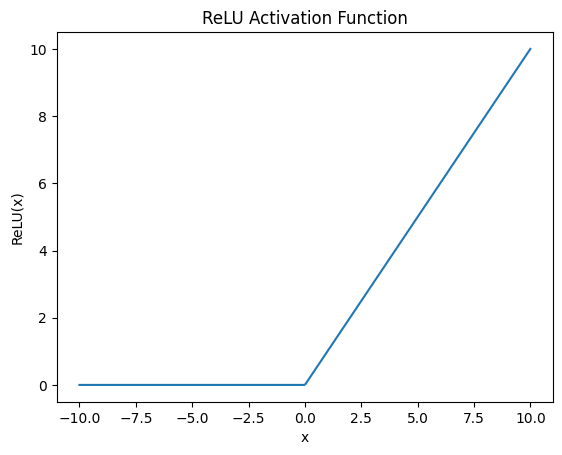

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Define the ReLU function
def relu(x):
    return np.maximum(0, x)

# Generate x values and corresponding ReLU values
x = np.linspace(-10, 10, 400)
y = relu(x)

# Plot
plt.plot(x, y, label="ReLU")
plt.xlabel("x")
plt.ylabel("ReLU(x)")
plt.title("ReLU Activation Function")
plt.grid(False)
plt.show()


As motivation for why we would be interested in the ReLU, we investigate its history (Section 4.2), features and advantages (Section 4.3). To better equip us in gaining insight from our empirical investigations in Section 5 and beyond, we also look at the disadvantages (Section 4.5).

## 4.2. History

The ReLU was first used by Alston Householder in 1941 as a mathematical abstraction of biological neural networks (those in the human nervous system rather than the deep learning method) [11]. It was introduced by Kunihiko Fukushima in 1969 to extract visual features using a neural network [12]. This seminal paper gives an insight into how the biological nervous system has led to the idea of a neural network. In particular, the ReLU works similar to a biological neuron, which either fires a signal or not. This matches the form of the ReLU, which has a positive signal for $x > 0$ and no signal otherwise.

As of 2017, ReLU is the most popular activation function for deep neural networks [7]. ReLUs are used widely, with applications in computer vision (the field concerned with the analysis and processing of images) [8], speech recognition [9], biology and neuroscience [10]. It is therefore an apt choice for our problem of classifying brain tumours.

## 4.3. Features of ReLU

In the literature, ReLU is noted to have several useful features and advantages. We summarise them below, using sources [7, 13, 14]:
- Non-linearity: Non-linearity is essential to work as an activation function. This is because a neural network essentially works by composition of functions, and linear functions are closed under composition. To see this, note that if $g(x) = ax + b$ then $$g(g(x)) = g(ax+b) = a(ax+b) + b = a^2 x + (ab  + b),$$ which is another linear function -- so overall we can simplify the network to just a linear function. Non-linearities are therefore essential.
- Sparse activation: In a randomly initialized network, only about 50% of hidden units are activated (have a non-zero output). Sparsity in matrices is extremely useful, as algorithms that can leverage sparsity are much faster [15] than other algorithms of the same type.
- Fewer "vanishing gradient" problems: There are fewer so-called "vanishing gradient" problems compared to sigmoidal activation functions that saturate in both directions [7]. We explain what the "vanishing gradient" problem is with an example, and try to understand why the ReLU may be more resistant to it than sigmoidal activation functions.

Note that the ReLU function is idempotent, meaning that $f(f(x)) = f(x)$. This is clearly seen by a calculation, since

$$
f(f(x)) = f(0) = 0 \text{ if } x < 0 \text{ and } f(f(x)) = f(x) = x \text{ if } x \geq 0.
$$

This property is very important for deep neural networks as many layers mean that many compositions of $f$ will happen. To contrast the idempotence of the ReLU, consider functions such as the sigmoid and hyperbolic tangent. Such functions "squash" their inputs. This leads to flat regions for more values of $ x$, resulting in the vanishing gradient problem: derivatives approach zero as the number of repeated compositions approaches infinity [13]. We illustrate this below.


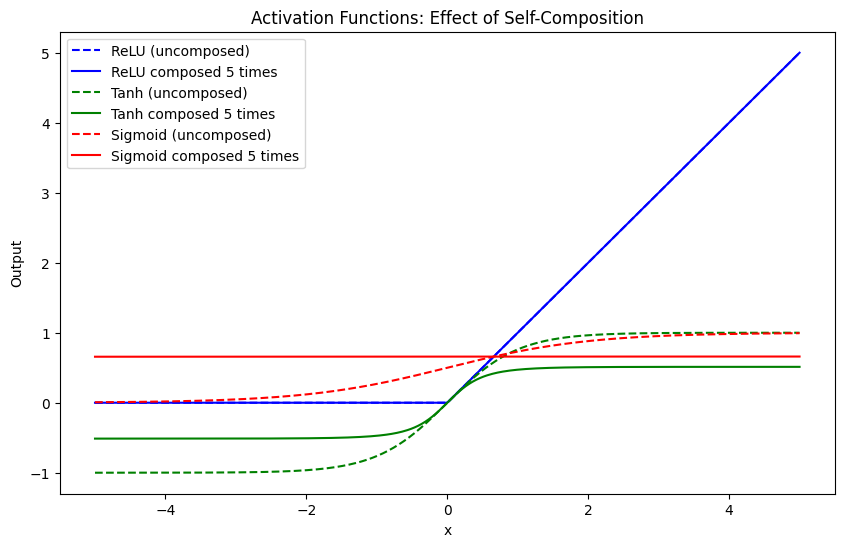

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Define activation functions
def relu(x): return np.maximum(0, x)
def tanh(x): return np.tanh(x)
def sigmoid(x): return 1 / (1 + np.exp(-x))

# Apply the activation function n times
def apply_composed(func, x, n=5):
    for _ in range(n):
        x = func(x)
    return x

# Generate x values
x = np.linspace(-5, 5, 400)

# Define activation functions and their colors
functions = [relu, tanh, sigmoid]
function_names = ["ReLU", "Tanh", "Sigmoid"]
colors = ["blue", "green", "red"]

# Plotting
plt.figure(figsize=(10, 6))
for func, name, color in zip(functions, function_names, colors):
    y = func(x)
    y_composed = apply_composed(func, x, n=5)
    plt.plot(x, y, label=f"{name} (uncomposed)", color=color, linestyle="--")
    plt.plot(x, y_composed, label=f"{name} composed 5 times", color=color)

# Adding labels and title
plt.title("Activation Functions: Effect of Self-Composition")
plt.xlabel("x")
plt.ylabel("Output")
plt.legend()
plt.grid(False)
plt.show()


- The picture shows the sigmoid function becoming almost flat over the whole range plotted, and the hyperbolic tangent becoming flatter. However, the idempotence of the ReLU means that there is no "flattening". Hence, the vanishing gradient problem may be less severe (but we will note a problem called "dying ReLU" later, so it should be noted that the ReLU is not completely impervious to the vanishing gradient problem).

- Another useful feature of the ReLU is that it is efficient to compute. It only requires a comparison and addition, without needing exponentiation or division. The gradient is also very efficient to compute, since it is just 1 for $x > 0 $ and 0 for $x < 0$. These have led to empirical observations that NNs with ReLU activations are quick to train [30]. We will be assessing this statement during our investigation.

- It is also scale-invariant, in the sense that $f(ax) = af(x)$ for any constant $a \geq 0$. While this does not have much practical relevance for us, it is a useful property that is actively researched to improve neural networks using the ReLU (see for example [29] which designs a stochastic gradient descent algorithm that leverages the scale invariance.)

- One advantage of the ReLU can be the biological plausibility: ReLU resembles the activation patterns in biological neurons, which either fire (activate) or remain inactive, making it intuitively appealing. In fact, the original justification for ReLus was that biological neurons either fire (positive signal) or not (0 signal) [29].

These advantages partly explain ReLU's popularity in applications. However, it is not without its faults, as we see next.

# 4.4 Disadvantages of ReLU
Below, we explain some disadvantages of the ReLU.
- Non-differentiable at zero: The value of the derivative at zero can be arbitrarily chosen to be 0 or 1.

- Not zero-centered: ReLU outputs are always non-negative. This can make it harder for the network to learn during backpropagation because gradient updates tend to push weights in one direction (positive or negative). Wikipedia [14] Batch normalization can help address this.
Unbounded.

- Unbounded Outputs: With large positive values, ReLU can produce high-magnitude outputs, potentially leading to "blow up" the activation function [30].

- "Dying ReLU": Note that the ReLU takes value 0 for negative inputs. Hence, ReLU neurons can sometimes be pushed into states in which they become inactive for essentially all inputs. In this state, no gradients flow backward through the neuron, and so the neuron becomes stuck in a perpetually inactive state and "dies". This is a form of the vanishing gradient problem. In some cases, large numbers of neurons in a network can become stuck in dead states, effectively decreasing the model capacity. This problem typically arises when the learning rate is set too high. It may be mitigated by using leaky ReLUs instead, which assign a small positive slope for x < 0; however, the performance is reduced.

We now move on to using the data. Armed with this information, we seek to understand how the parameters of a neural network affect it when using the ReLU activation function in the intermediate layers.

# 5. Data Loading

We now load the data, and perform the preprocessing as in the EDA. After that, we will then showcase the data augmentation process.

In [7]:
pip install imutils


In [8]:
from pathlib import Path  # Import pathlib to work with paths
import kagglehub
import os  # Import os module for file operations
import hashlib
import numpy as np
from tqdm import tqdm
import cv2
import os
import imutils

# Download latest version
path = kagglehub.dataset_download("masoudnickparvar/brain-tumor-mri-dataset")

print("Path to dataset files:", path)

# Convert path to a Path object
path = Path(path)

# Define your project directory and labels based on your dataset structure
PROJECT_DIR = path
LABELS = ['pituitary', 'notumor', 'meningioma', 'glioma']  # Adjust these labels based on your dataset's folder names

def crop_img(img):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    gray = cv2.GaussianBlur(gray, (3, 3), 0)
    thresh = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
    thresh = cv2.erode(thresh, None, iterations=2)
    thresh = cv2.dilate(thresh, None, iterations=2)
    cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    c = max(cnts, key=cv2.contourArea)
    extLeft = tuple(c[c[:, :, 0].argmin()][0])
    extRight = tuple(c[c[:, :, 0].argmax()][0])
    extTop = tuple(c[c[:, :, 1].argmin()][0])
    extBot = tuple(c[c[:, :, 1].argmax()][0])
    ADD_PIXELS = 0
    new_img = img[extTop[1]-ADD_PIXELS:extBot[1]+ADD_PIXELS, extLeft[0]-ADD_PIXELS:extRight[0]+ADD_PIXELS].copy()
    return new_img


# Convert 'path' to Path object (already done above)
train_dir = path / "Training"
test_dir = path / "Testing"

if __name__ == "__main__":
    training = train_dir
    testing = test_dir

    training_dir = os.listdir(training)
    testing_dir = os.listdir(testing)

    IMG_SIZE = 256

    for dir in training_dir:
        save_path = Path('cleaned/Training') / dir  # Using pathlib's '/' operator
        path = training / dir  # Using pathlib's '/' operator
        image_dir = os.listdir(path)

        for img in image_dir:
            image = cv2.imread(str(path / img))  # Convert Path to string for OpenCV
            new_img = crop_img(image)
            new_img = cv2.resize(new_img, (IMG_SIZE, IMG_SIZE))

            if not save_path.exists():
                save_path.mkdir(parents=True)

            cv2.imwrite(str(save_path / img), new_img)  # Convert Path to string for OpenCV

    for dir in testing_dir:
        save_path = Path('cleaned/Testing') / dir
        path = testing / dir
        image_dir = os.listdir(path)

        for img in image_dir:
            image = cv2.imread(str(path / img))
            new_img = crop_img(image)
            new_img = cv2.resize(new_img, (IMG_SIZE, IMG_SIZE))

            if not save_path.exists():
                save_path.mkdir(parents=True)

            cv2.imwrite(str(save_path / img), new_img)


100%|██████████| 149M/149M [00:01<00:00, 83.1MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/masoudnickparvar/brain-tumor-mri-dataset/versions/1


# 6. Data Augmentation

We perform data augmentation. We explain what data augmentation is below, synthesising material from [1, 3, 4, 5, 6].

# 6.1. Purpose of Data Augmentation

To overcome the problem of limited quantity and diversity of data, we perform data augmentation. Data augmentation refers to generating artificial data to allow the neural network (or any machine learning model in general) to generalise better during the testing (or deployment) phase [1]. The data has to have good diversity as the object of interest needs to be present in varying sizes, lighting conditions and poses to be able to achieve generalisability. When convolutional neural networks grew larger in mid-1990s, there was a lack of data to use, especially considering that some part of the overall dataset should be spared for later testing. It was proposed to perturb existing data with affine transformations to create new examples with the same labels [6], leading to data augmentation techniques, which are still widely used as of 2010s [8].

In particular, there are several types of perturbations possible, including geometric transformations, zooms, and changing the brightness and contrast.

# 6.2. Performing Data Augmentation
To achieve this, we will use `ImageDataGenerator` [3] from `keras` to rescale the pixel values, do geometric transformations (rotations, flips, shears, zooms) of images and more.

In [10]:
from pathlib import Path  # Import pathlib to work with paths
import kagglehub
import os  # Import os module for file operations
import hashlib
import numpy as np
from tqdm import tqdm
import cv2
import imutils
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.activations import swish
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Define directories for training and testing images
train_dir = Path('cleaned/Training')
test_dir = Path('cleaned/Testing')

# Number of classes
LABELS = ['pituitary', 'notumor', 'meningioma', 'glioma']

# Image size and batch size
IMG_SIZE = 64  # Resize images to 64x64
BATCH_SIZE = 32

# Setup ImageDataGenerators for loading and preprocessing the images
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,  # Normalize pixel values to [0, 1]
    rotation_range=20,  # Random rotation
    width_shift_range=0.1,  # Horizontal shift
    height_shift_range=0.1,  # Vertical shift
    shear_range=0.2,  # Shear transformation
    zoom_range=0.2,  # Zoom in and out
    horizontal_flip=True,  # Flip horizontally
    fill_mode='nearest',  # Fill any missing pixels using the nearest pixel
    brightness_range=(0.5, 1.5),  # Randomly adjust brightness between 0.5 and 1.5 times the original
    channel_shift_range=20.0,  # Randomly shift RGB channels (intensity)
    validation_split=0.2  # Use 20% of the training data for validation
)

test_datagen = ImageDataGenerator(rescale=1.0/255.0)  # Only rescale for test data

# Load images from directories using ImageDataGenerator
print('Training Data: ')
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_SIZE, IMG_SIZE),  # Resize images to 64x64
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset = 'training',
    shuffle=True
)
print('Validation Data: ')
validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_SIZE, IMG_SIZE),  # Resize images to 64x64
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset = 'validation',
    shuffle=True
)
print('Testing Data: ')
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_SIZE, IMG_SIZE),  # Resize images to 64x64
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False  # Do not shuffle for test data
)


Training Data: 
Found 4571 images belonging to 4 classes.
Validation Data: 
Found 1141 images belonging to 4 classes.
Testing Data: 
Found 1311 images belonging to 4 classes.


We explain what each of the arguments in `ImageDataGenerator` do, using the documentation [3].

1. Rotation: rotates images randomly. This helps the model learn to recognize features regardless of their orientation. This is particularly useful as we have seen some images where the subject of the image might be positioned at different angles (brain scans that are slightly tilted).

2. Width and height Shift: randomly shifts images horizontally (for width) and vertically (for height). This helps the model learn to recognize features regardless of their position. For example, if a brain tumor is off-center, this augmentation allows the model to still recognize it.

3. Shear: applies a shearing transformation, which skews the image in a way that one side `slants' towards the other. This helps the model recognize objects that might be deformed or angled in an unusual way. This can simulate slight distortions that might occur in real-world imaging data.

4. Zoom: randomly zooms into the image by up to 20%. This helps the model to learn from both close-up and wide-view perspectives of the features. This helps in our case as the brain tumours may be different sizes.

5. Horizontal Flip: flips the image horizontally with a 50% chance. This helps the model to be invariant to the left-right orientation of features. In cases where tumors or other key structures are equally likely to be on either side, this augmentation is helpful.

6. Fill Mode (fill_mode='nearest'): this parameter makes `keras` fill in pixels created by transformations like shifts and rotations by ensuring that new pixels introduced by transformations take the value of the nearest pixel, which can help preserve context and continuity at image edges.

7. Brightness Range: adjusts the brightness of the image randomly within the specified range, helping the model learn to recognize features under varying lighting conditions, which simulates different imaging conditions and improves the model's robustness.

8. Channel Shift Range: since images are grayscale, this effectively acts as a contrast adjustment. By shifting pixel values uniformly, it either darkens or lightens the image.

We show a sample of images that result from the data augmentation.

Selected random image: cleaned/Training/notumor/Tr-no_0672.jpg


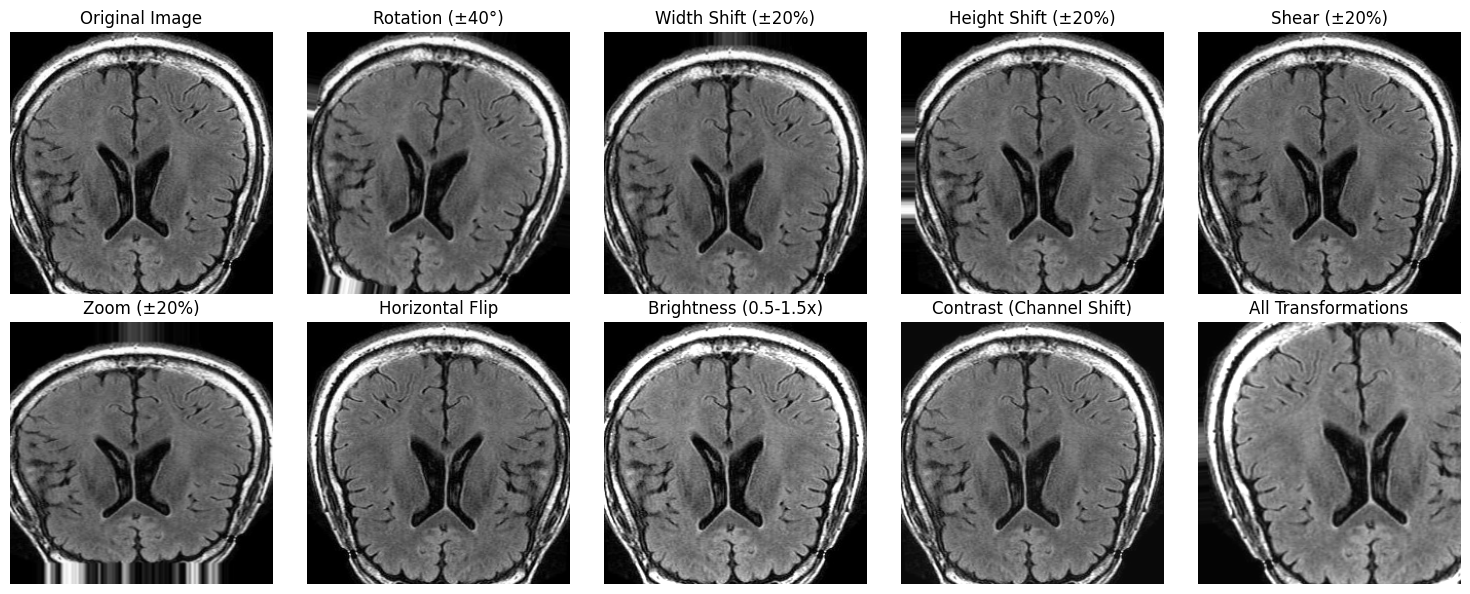

In [11]:
import random
import numpy as np
from pathlib import Path
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import matplotlib.pyplot as plt

# Set a fixed seed for reproducibility
seed = 42
random.seed(seed)
np.random.seed(seed)

# Define the train directory
train_dir = Path('cleaned/Training')

# Get all label subdirectories (e.g., pituitary, notumor, etc.)
label_dirs = [d for d in train_dir.iterdir() if d.is_dir()]

# Choose a random label directory and a random image within it
# Uncomment the following lines to randomly select an image
# random_label_dir = random.choice(label_dirs)
# image_files = list(random_label_dir.glob('*.jpg'))  # Assuming images are in .jpg format
# random_image_path = random.choice(image_files)
random_image_path = "cleaned/Training/notumor/Tr-no_0672.jpg"  # Manually specify an image path

# Load the chosen random image
img = load_img(random_image_path)  # Load the image
img_array = img_to_array(img)      # Convert to numpy array
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension for generator

# Print selected image path
print(f"Selected random image: {random_image_path}")

# Function to display augmented images in rows, starting with the original image
def display_augmented_images_with_original(datagen_dict, img_array, rows=2, cols=5):
    fig, axes = plt.subplots(rows, cols, figsize=(15, 6))
    axes = axes.flatten()  # Flatten to iterate easily

    # Display the original image in the first slot
    axes[0].imshow(img_array[0].astype('uint8'), cmap='gray')  # Assuming grayscale images
    axes[0].axis('off')
    axes[0].set_title("Original Image")

    # Display each augmentation in the remaining slots
    for ax, (title, datagen) in zip(axes[1:], datagen_dict.items()):
        augmented_images = datagen.flow(img_array, batch_size=1, seed=seed)
        aug_img = next(augmented_images)[0].astype('uint8')  # Generate one augmented image
        ax.imshow(aug_img, cmap='gray')  # Assuming grayscale images
        ax.axis('off')
        ax.set_title(title)

    plt.tight_layout()
    plt.show()

# Define individual augmentations as datagen instances with titles (excluding Fill Mode only)
datagen_dict = {
    "Rotation (±40°)": ImageDataGenerator(rotation_range=40),
    "Width Shift (±20%)": ImageDataGenerator(width_shift_range=0.2),
    "Height Shift (±20%)": ImageDataGenerator(height_shift_range=0.2),
    "Shear (±20%)": ImageDataGenerator(shear_range=0.2),
    "Zoom (±20%)": ImageDataGenerator(zoom_range=0.2),
    "Horizontal Flip": ImageDataGenerator(horizontal_flip=True),
    "Brightness (0.5-1.5x)": ImageDataGenerator(brightness_range=(0.5, 1.5)),
    "Contrast (Channel Shift)": ImageDataGenerator(channel_shift_range=20.0),
    "All Transformations": ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest',
        brightness_range=(0.5, 1.5),
        channel_shift_range=20.0
    )
}

# Display the original image followed by augmentations in a 2x5 grid
display_augmented_images_with_original(datagen_dict, img_array)


We can see that the code indeed produces the augmentations that they claim to do. Note that the values next to the transformation only indicate the range of the transformations performed. To clarify, "Rotation ($\pm$ 40 degrees)" means that a rotation of up to 40 degrees clockwise or anticlockwise is performed. We emphasise that this is not necessarily a rotation of exactly 40 degrees.

We can see distortions in the rotation and zoom images. This highlights the importance of using the `fill_mode` parameter in `keras`, which will prevent such things from happening, as we can see in the last image which used a random combination of augmentations along with `fill_mode`.

# Investigations

Comments [seek to investigate what? ... depth, batch size, learning rate. What else?

# Depth

Set padding to "same" to prevent dimension when becoming negative at high depth.

In [22]:
import os
import json
import time
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models

# Parameters
IMG_SIZE = 64
NUM_CLASSES = len(LABELS)
EPOCHS = 50
BATCH_SIZE = 32

# Directory to save models and histories
save_dir = 'model_saves'
os.makedirs(save_dir, exist_ok=True)

# Function to build CNN model with varying depth
def build_cnn_model(num_conv_layers, img_size, num_classes, filter_base=32, dense_units=128):
    model = models.Sequential()
    for i in range(num_conv_layers):
        filters = filter_base * (2**i)
        if i == 0:
            # First layer specifies input shape
            model.add(layers.Conv2D(filters, (3, 3), activation='relu', padding='same', input_shape=(img_size, img_size, 3)))
        else:
            model.add(layers.Conv2D(filters, (3, 3), activation='relu', padding='same'))
        model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Flatten())
    model.add(layers.Dense(dense_units, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Loop through depths, including 1 conv layer, train, evaluate, and save results
for num_conv_layers in range(1, 6):  # Testing depths from 1 to 5 conv layers
    model_path = os.path.join(save_dir, f"model_depth_{num_conv_layers}.h5")
    history_path = os.path.join(save_dir, f"history_depth_{num_conv_layers}.json")

    # Check if the model and history for this depth already exists
    if os.path.exists(model_path) and os.path.exists(history_path):
        print(f"Model and history with {num_conv_layers} layers already exist, skipping training...")
        continue

    print(f"\nTraining model with {num_conv_layers} convolutional layers...\n")

    # Build model with specified depth
    model = build_cnn_model(num_conv_layers, IMG_SIZE, NUM_CLASSES)

    # Track training time
    start_time = time.time()

    # Train the model
    history = model.fit(
        train_generator,
        steps_per_epoch=train_generator.samples // BATCH_SIZE,
        epochs=EPOCHS,
        validation_data=validation_generator,
        validation_steps=validation_generator.samples // BATCH_SIZE
    )

    # Calculate training time
    training_time = time.time() - start_time
    print(f"Training time for {num_conv_layers} conv layers: {training_time:.2f} seconds")

    # Save the model
    model.save(model_path)
    print(f"Model with {num_conv_layers} convolutional layers saved as {model_path}")

    # Save training history
    history_data = {
        "accuracy": history.history["accuracy"],
        "val_accuracy": history.history["val_accuracy"],
        "loss": history.history["loss"],
        "val_loss": history.history["val_loss"],
        "training_time": training_time
    }
    with open(history_path, 'w') as file:
        json.dump(history_data, file)
    print(f"Training history saved as {history_path}")

Model and history with 1 layers already exist, skipping training...
Model and history with 2 layers already exist, skipping training...
Model and history with 3 layers already exist, skipping training...
Model and history with 4 layers already exist, skipping training...
Model and history with 5 layers already exist, skipping training...


Plotting. Plots of accuracy.

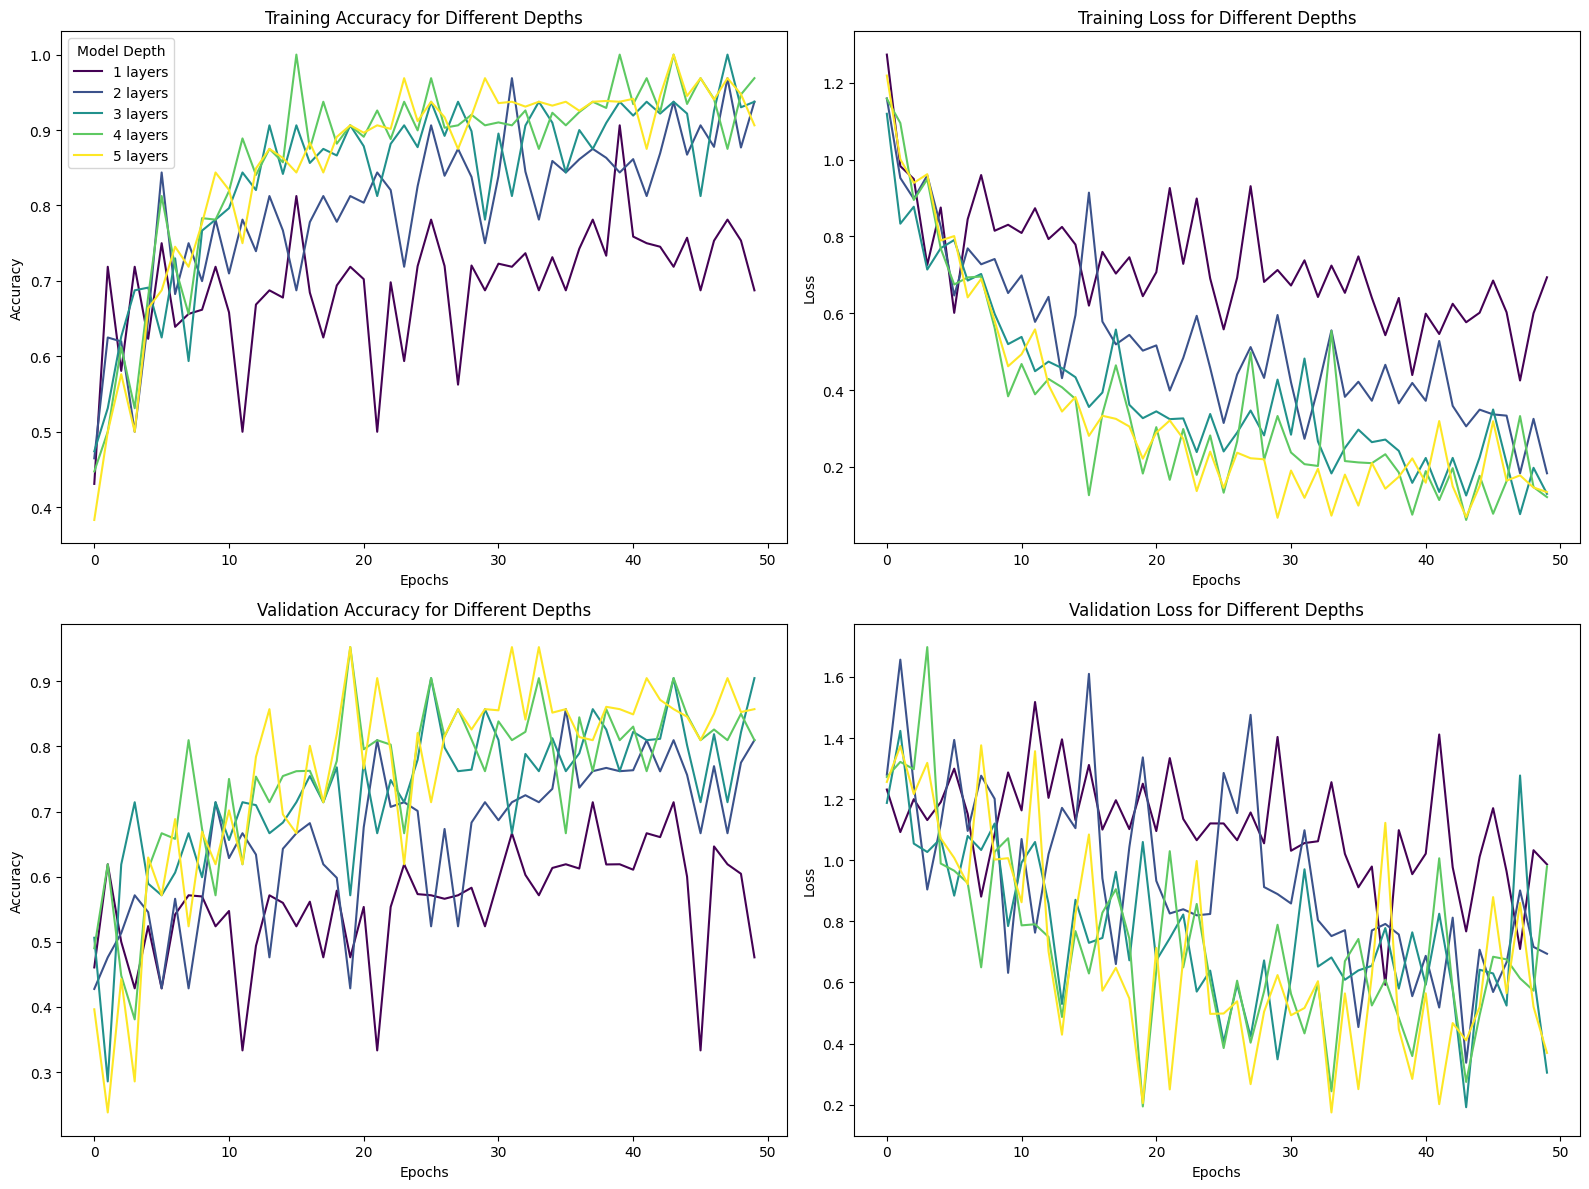

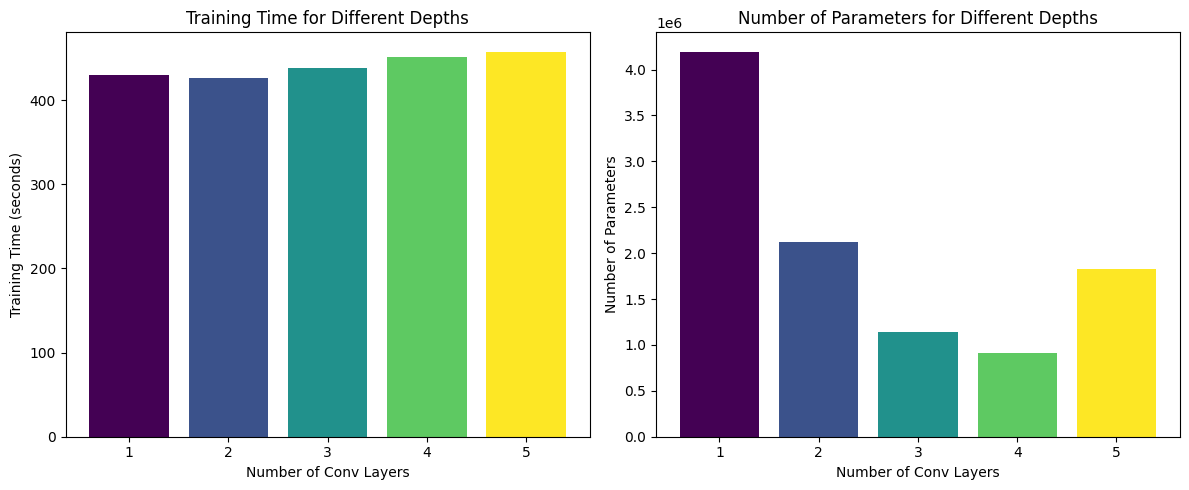

In [20]:
import json
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Directory where models and history are saved
save_dir = 'model_saves'

# Initialize lists for plotting
training_times = []
num_parameters = []
depth_accuracy_data = []

# Depths to analyze (from 1 to 5 layers)
depths = range(1, 6)

# Load model and history for each depth
for num_conv_layers in depths:
    model_path = os.path.join(save_dir, f"model_depth_{num_conv_layers}.h5")
    history_path = os.path.join(save_dir, f"history_depth_{num_conv_layers}.json")

    if os.path.exists(model_path) and os.path.exists(history_path):
        # Load the model to retrieve the number of parameters
        model = load_model(model_path)
        num_parameters.append(model.count_params())

        # Load history data
        with open(history_path, 'r') as f:
            history_data = json.load(f)
            depth_accuracy_data.append({
                'depth': num_conv_layers,
                'train_accuracy': history_data['accuracy'],
                'train_loss': history_data['loss'],
                'val_accuracy': history_data['val_accuracy'],
                'val_loss': history_data['val_loss']
            })
            training_times.append(history_data['training_time'])
    else:
        print(f"No model or history found for depth {num_conv_layers}.")

# Colors for different depths using the viridis colormap
from matplotlib.cm import viridis
colors = viridis(np.linspace(0, 1, len(depth_accuracy_data)))

# Create subplots for accuracy and loss
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

# Plot Training Accuracy
for i, data in enumerate(depth_accuracy_data):
    axs[0, 0].plot(data['train_accuracy'], color=colors[i], label=f'{data["depth"]} layers')
axs[0, 0].set_title('Training Accuracy for Different Depths')
axs[0, 0].set_xlabel('Epochs')
axs[0, 0].set_ylabel('Accuracy')
axs[0, 0].legend(title='Model Depth')

# Plot Training Loss
for i, data in enumerate(depth_accuracy_data):
    axs[0, 1].plot(data['train_loss'], color=colors[i], label=f'{data["depth"]} layers')
axs[0, 1].set_title('Training Loss for Different Depths')
axs[0, 1].set_xlabel('Epochs')
axs[0, 1].set_ylabel('Loss')

# Plot Validation Accuracy
for i, data in enumerate(depth_accuracy_data):
    axs[1, 0].plot(data['val_accuracy'], color=colors[i], label=f'{data["depth"]} layers')
axs[1, 0].set_title('Validation Accuracy for Different Depths')
axs[1, 0].set_xlabel('Epochs')
axs[1, 0].set_ylabel('Accuracy')

# Plot Validation Loss
for i, data in enumerate(depth_accuracy_data):
    axs[1, 1].plot(data['val_loss'], color=colors[i], label=f'{data["depth"]} layers')
axs[1, 1].set_title('Validation Loss for Different Depths')
axs[1, 1].set_xlabel('Epochs')
axs[1, 1].set_ylabel('Loss')

plt.tight_layout()
plt.show()

# Plot Training Time and Number of Parameters
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Bar chart for Training Time
ax1.bar([data['depth'] for data in depth_accuracy_data], training_times, color=colors)
ax1.set_title('Training Time for Different Depths')
ax1.set_xlabel('Number of Conv Layers')
ax1.set_ylabel('Training Time (seconds)')

# Bar chart for Number of Parameters
ax2.bar([data['depth'] for data in depth_accuracy_data], num_parameters, color=colors)
ax2.set_title('Number of Parameters for Different Depths')
ax2.set_xlabel('Number of Conv Layers')
ax2.set_ylabel('Number of Parameters')

plt.tight_layout()
plt.show()



Quick notes: Surprisingly, number of parameters largest for 1 layer? Need to check it. Training time increasing but not by that much. Not much difference between 4 and 5 layers.

# Learning Rate

Gradient descent: the learning rate is the "step size". Adaptive recommended: Will try an annealing scheme. https://medium.com/@danielonugha0/how-to-change-the-learning-rate-of-tensorflow-b5d854819050

# References

Check later to update this for consistency.

[1] Data Augmentation: [Medium Article](https://medium.com/ymedialabs-innovation/data-augmentation-techniques-in-cnn-using-tensorflow-371ae43d5be9)

[2] Image processing for medical diagnosis using CNN - P Arena, A Basile, M Bucolo, L Fortuna - Nuclear Instruments and Methods, 2003 - Elsevier.

[3] Documentation of `ImageDataGenerator` from `keras`: https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

[4] Data Augmentation IBM Article: https://www.ibm.com/topics/data-augmentation

[5] Data Augmentation DataCamp Article: https://www.datacamp.com/tutorial/complete-guide-data-augmentation

[6] Data Augmentation Wikipedia Article: https://en.wikipedia.org/wiki/Data_augmentation

[7] Ramachandran, Prajit; Barret, Zoph; Quoc, V. Le (October 16, 2017). "Searching for Activation Functions". arXiv:1710.05941 [cs.NE].

[8] Xavier Glorot; Antoine Bordes; Yoshua Bengio (2011). Deep sparse rectifier neural networks (PDF). AISTATS. Rectifier and softplus activation functions. The second one is a smooth version of the first.

[9] László Tóth (2013). Phone Recognition with Deep Sparse Rectifier Neural Networks (PDF).

[10] Bhoi, Akash Kumar, et al., eds. Bio-inspired neurocomputing. Vol. 310. Berlin/Heidelberg, Germany: Springer, 2021.

[11] Householder, Alston S. (June 1941). "A theory of steady-state activity in nerve-fiber networks: I. Definitions and preliminary lemmas". The Bulletin of Mathematical Biophysics. 3 (2): 63–69. doi:10.1007/BF02478220. ISSN 0007-4985.

[12] Fukushima, K. (1969). "Visual feature extraction by a multilayered network of analog threshold elements". IEEE Transactions on Systems Science and Cybernetics. 5 (4): 322–333. doi:10.1109/TSSC.1969.300225.

[13] Why use the ReLU? https://stats.stackexchange.com/questions/226923/why-do-we-use-relu-in-neural-networks-and-how-do-we-use-it

[14] Wikipedia article on ReLU: https://en.wikipedia.org/wiki/Rectifier_(neural_networks)#cite_note-3

[15] Bai, Yuhan. "RELU-function and derived function review." SHS Web of Conferences. Vol. 144. EDP Sciences, 2022.

[16] History of Neural Networks: https://en.wikipedia.org/wiki/Neural_network

[17] Neural network lecture notes: https://dsbristol.github.io/dst/assets/slides/07.1-PerceptronsNeuralNets.pdf

[18] Bias neuron: https://stackoverflow.com/questions/2480650/what-is-the-role-of-the-bias-in-neural-networks

[19] Convolutional neural network: https://en.wikipedia.org/wiki/Convolutional_neural_network

[20] https://news.mit.edu/2017/explained-neural-networks-deep-learning-0414

[21] https://stats.stackexchange.com/questions/233253/tensors-in-neural-network-literature-whats-the-simplest-definition-out-there

[22] Tensor notation to express backpropagation: https://dlvu.github.io/slides/dlvu.lecture02.pdf

[23] van Dyck, Leonard Elia; Kwitt, Roland; Denzler, Sebastian Jochen; Gruber, Walter Roland (2021). "Comparing Object Recognition in Humans and Deep Convolutional Neural Networks—An Eye Tracking Study". Frontiers in Neuroscience. 15: 750639. doi:10.3389/fnins.2021.750639. ISSN 1662-453X. PMC 8526843. PMID 34690686.

[24] https://svitla.com/blog/cnn-for-image-processing/

[25] https://poloclub.github.io/cnn-explainer/

[26] https://medium.com/advanced-deep-learning/cnn-operation-with-2-kernels-resulting-in-2-feature-mapsunderstanding-the-convolutional-filter-c4aad26cf32

[27] https://en.wikipedia.org/wiki/AlexNet#:~:text=AlexNet%20is%20the%20name%20of,D.

[28] https://www.geeksforgeeks.org/cnn-introduction-to-padding/

[29] ReLU origins: https://news.ycombinator.com/item?id=13338389

[30] https://stats.stackexchange.com/questions/126238/what-are-the-advantages-of-relu-over-sigmoid-function-in-deep-neural-networks

[31] Robbins, Herbert, and Sutton Monro. "A stochastic approximation method." The annals of mathematical statistics (1951): 400-407. https://projecteuclid.org/journals/annals-of-mathematical-statistics/volume-22/issue-3/A-Stochastic-Approximation-Method/10.1214/aoms/1177729586.full

[32] https://stats.stackexchange.com/questions/230120/neural-networks-is-an-epoch-in-sgd-the-same-as-an-epoch-in-mini-batch